# Stability

CFL for 1d linear convection must be $<=1$.This means
$$c\frac{\Delta{}t}{\Delta{}x}\leq1$$
With this you can calculate $\Delta{}x$
$$\Delta{}x\leq\frac{\Delta{}x}{c}=\frac{0.2}{4}$$

In [4]:
print('x may not exceed %.2f' % (0.2/4))

x may not exceed 0.05


# Sympy

In [14]:
import numpy
import sympy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

from sympy import init_printing
init_printing()

from sympy.utilities.lambdify import lambdify

In [15]:
x = sympy.symbols('x')

In [16]:
phi = sympy.cos(x)**2*sympy.sin(x)**3/(4*x**5*sympy.exp(x))

In [17]:
phiprime=phi.diff(x)

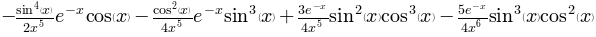

In [28]:
phiprime

In [30]:
philamb = lambdify((x),phiprime)

In [32]:
print("The value of phi at x=2.2 is {:.6f}.".format(philamb(2.2)))

The value of phi at x=2.2 is -0.000266.


# Coding assignment: traffic flow

In [37]:
nx = 51
L=11
dx = L/(nx-1)
nt = 50    
dt = .001  
rhomax = 250
vmax = 80

x = numpy.linspace(0,L,nx)
rho0 = numpy.ones(nx)*10
rho0[10:20] = 50

$$F=V_{max}\rho\bigg(1-\frac{\rho}{\rho_{max}}\bigg)$$

In [43]:
rho=rho0
v=numpy.zeros(nx)
vn=numpy.zeros(nx)
for n in range(1,nt):  
    rho[0]=10
    rhon = rho.copy() 
    for i in range(1,nx): 
        rho[i] = rhon[i]-dt/dx*vmax*(rhon[i]-rhon[i]**2/rhomax-rhon[i-1]+rhon[i-1]**2/rhomax)
    for i in range(1,nx):
        v[i]=vmax*rho[i]*(1-(rho[i]/rhomax))/rho[i]
    for j in range(nx):
        vn[i]=vmax*rhon[i]*(1-(rhon[i]/rhomax))/rhon[i]
        

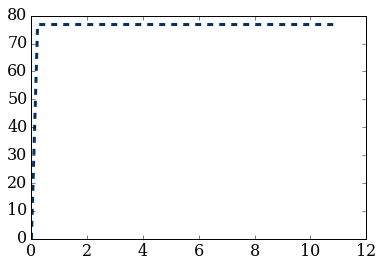

In [45]:
pyplot.plot(x, v, color='#003366', ls='--', lw=3)

Minimum Velocity at t = 0 minutes:  17.7777777778 m/s
Average Velocity at t = 3 minutes:  20.6361661961 m/s
Minimum Velocity at t = 6 minutes:  18.7847168709 m/s


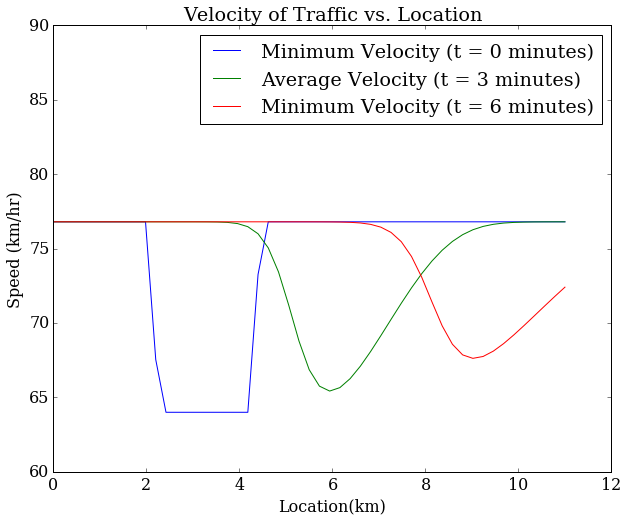

In [46]:
## Part A: modular version
##Import all necessary libraries and setup configurations
import numpy
from matplotlib import pyplot, rcParams
%matplotlib inline
rcParams['font.family']='serif'
rcParams['font.size']=16

#Defining Modular function
def traffic_flow(nt,init,lab):
    ##Creating variable constants as defined by the problem
    vmax = 80. #km/hr
    L = 11. #km
    rhomax = 250. #cars/hr
    nx = 51 #number of intervals in your space vector
    dx = x[1]-x[0] #dx
    dt = 0.001 #hours
    scale = 5/18 #conversion factor from km/hr to m/s
    v = numpy.zeros(nx)
    vn = numpy.zeros(nx)
    rho = numpy.ones(nx)*init
    rho[10:20] = 50
    rho[0] = init

    for i in range(nt):
        rn = rho.copy()
        for j in range(1,nx):
            rho[j] = rn[j] - dt/dx*((vmax*rn[j]*(1-(rn[j]/rhomax))) - (vmax*rn[j-1]*(1-(rn[j-1]/rhomax))))
            rho[0]=init
        for j in range(nx):
            v[j]=vmax*rho[j]*(1-(rho[j]/rhomax))/rho[j]
        for j in range(nx):
            vn[j]=vmax*rn[j]*(1-(rn[j]/rhomax))/rn[j]
    #Visualization code, assumes a figure has been created already   
    pyplot.plot(x,v,label=lab)
    pyplot.title('Velocity of Traffic vs. Location')
    pyplot.xlabel('Location(km)')
    pyplot.ylabel('Speed (km/hr)')
    pyplot.ylim(60,90)
    pyplot.legend(loc='upper right')
    #plt.show()
    
    return rho,(v*scale),rn,(vn*scale)

#Creating figure for visualization
pyplot.figure(figsize=(10,8))

# Part A - solutions
r,v,rn,vn=traffic_flow(1,10,'Minimum Velocity (t = 0 minutes)')
print("Minimum Velocity at t = 0 minutes: ",min(vn),"m/s")

r,v,rn,vn=traffic_flow(50,10,'Average Velocity (t = 3 minutes)')
print("Average Velocity at t = 3 minutes: ",(sum(v)/51),"m/s")

r,v,rn,vn=traffic_flow(100,10,'Minimum Velocity (t = 6 minutes)')
print("Minimum Velocity at t = 6 minutes: ",min(v),"m/s")

Minimum Velocity at t = 0 minutes:  30.2222222222 m/s
Average Velocity at t = 3 minutes:  33.872218191 m/s
Minimum Velocity at t = 3 minutes:  30.9864026806 m/s


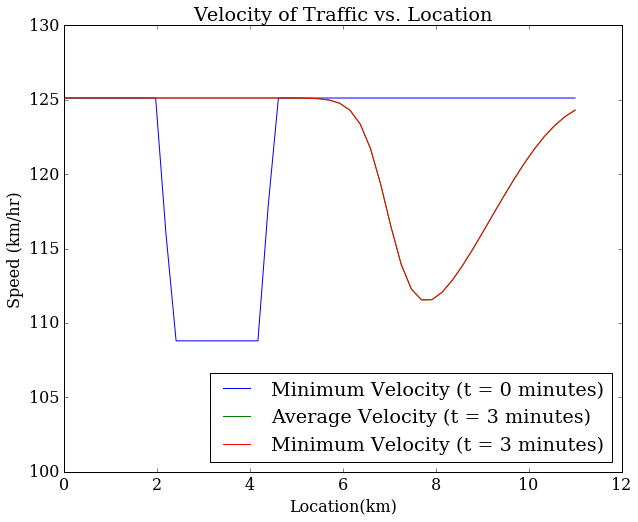

In [47]:
## Part B: modular version
##Import all necessary libraries and setup configurations
import numpy
from matplotlib import pyplot, rcParams
%matplotlib inline
rcParams['font.family']='serif'
rcParams['font.size']=16

#Defining Modular function
def traffic_flow(nt,init,lab):
    ##Creating variable constants as defined by the problem
    vmax = 136. #km/hr
    L = 11. #km
    rhomax = 250. #cars/hr
    nx = 51 #number of intervals in your space vector
    dx = x[1]-x[0] #dx
    dt = 0.001 #hours
    scale = 5/18 #conversion factor from km/hr to m/s
    v = numpy.zeros(nx)
    vn = numpy.zeros(nx)
    rho = numpy.ones(nx)*init
    rho[10:20] = 50
    rho[0] = init

    for i in range(nt):
        rn = rho.copy()
        for j in range(1,nx):
            rho[j] = rn[j] - dt/dx*((vmax*rn[j]*(1-(rn[j]/rhomax))) - (vmax*rn[j-1]*(1-(rn[j-1]/rhomax))))
            rho[0]=init
        for j in range(nx):
            v[j]=vmax*rho[j]*(1-(rho[j]/rhomax))/rho[j]
        for j in range(nx):
            vn[j]=vmax*rn[j]*(1-(rn[j]/rhomax))/rn[j]
    #Visualization code, assumes a figure has been created already   
    pyplot.plot(x,v,label=lab)
    pyplot.title('Velocity of Traffic vs. Location')
    pyplot.xlabel('Location(km)')
    pyplot.ylabel('Speed (km/hr)')
    pyplot.ylim(100,130)
    pyplot.legend(loc='lower right')
    #plt.show()
    
    return rho,(v*scale),rn,(vn*scale)

#Creating figure for visualization
pyplot.figure(figsize=(10,8))

# Part B - solutions
r,v,rn,vn=traffic_flow(1,20,'Minimum Velocity (t = 0 minutes)')
print("Minimum Velocity at t = 0 minutes: ",min(vn),"m/s")

r,v,rn,vn=traffic_flow(50,20,'Average Velocity (t = 3 minutes)')
print("Average Velocity at t = 3 minutes: ",(sum(v)/51),"m/s")

r,v,rn,vn=traffic_flow(50,20,'Minimum Velocity (t = 3 minutes)')
print("Minimum Velocity at t = 3 minutes: ",min(v),"m/s")